# GYM FISHING WITH PP0

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


import gym
import gym_fishing

from stable_baselines3 import PPO

In [2]:
env = gym.make('fishing-v0')
env.n_actions = 100
model = PPO('MlpPolicy', env, verbose=1)

Using cpu device
Wrapping the env in a DummyVecEnv.


In [3]:
model.learn(total_timesteps=200000)

ned_variance   | -1.88e+03    |
|    learning_rate        | 0.0003       |
|    loss                 | 0.00459      |
|    n_updates            | 720          |
|    policy_gradient_loss | -0.000489    |
|    value_loss           | 0.0279       |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 1016         |
|    iterations           | 74           |
|    time_elapsed         | 149          |
|    total timesteps      | 151552       |
| train/                  |              |
|    approx_kl            | 8.507329e-05 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.0121      |
|    explained_variance   | -1.6e+03     |
|    learning_rate        | 0.0003       |
|    loss                 | 0.0044       |
|    n_updates            | 730          |
|    policy_gradient_loss | -2.65e-06    |
|    value_loss       

In [4]:
def simulate(environment, model):
  obs = env.reset()
  episode_return = 0.0
  output = np.zeros(shape = (1000, 4))

  for it in range(1000):
    action, _states = model.predict(obs)
    obs, reward, dones, info = env.step(action)  
    episode_return += reward
    output[it] = (it, obs, action, episode_return)
  return output

In [5]:
out = simulate(env, model)
np.savetxt("ppo.csv", out, delimiter=",")

### Vizualisation

In [6]:
datapath = '/Users/kevinab/Desktop/PRe/conservation-agents/ppo.csv'
results = pd.read_csv(datapath, names=['time','state','harvest','action'])

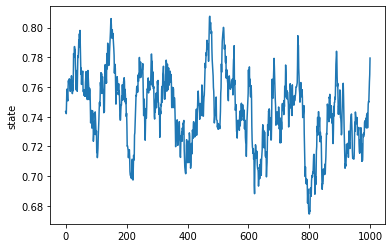

In [7]:
plt.plot(results.iloc[:,1])
plt.ylabel('state')
plt.show()

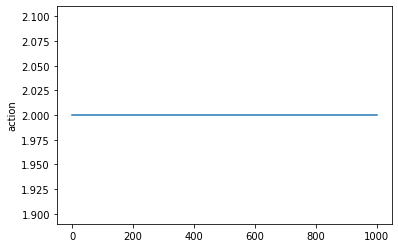

In [8]:
plt.plot(results.iloc[:,2])
plt.ylabel('action')
plt.show()

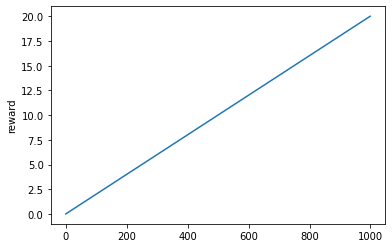

In [10]:
plt.plot(results.iloc[:,3])
plt.ylabel('reward')
plt.show()